In [7]:
!pip install -r requirements.txt

In [31]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




In [12]:
os.getcwd()

'd:\\ML\\ZuuCrew\\Advanced-Telco-Churn-Prediction-System\\notebooks'

In [15]:
df = pd.read_csv('../data/raw/hmQOVnDvRN.csv')
df.head(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
df_cp = df.copy()
df_cp = df_cp.dropna(axis = 0)
df_cp

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [22]:
df_1 = df_cp.drop(
                          columns =[
                                  'customerID'
                                  ]

                          )
df_1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
df_1.to_csv(
                  '../data/processed/MissingValuesHandled.csv',
                  index= False
                )

In [24]:
print(f"No of Rows : {len(df_1)}")

No of Rows : 7043


In [25]:
categorical_columns = [
    'gender',
    'SeniorCitizen', 
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod',
    'Churn'
]

numerical_columns = [
    'tenure',
    'MonthlyCharges',
    'TotalCharges'
]

=== CHECKING NUMERICAL COLUMNS ===

Column: tenure
Data type: int64
Unique values count: 73
Sample values: [ 1 34  2 45  8 22 10 28 62 13]
Contains non-numeric values: False

Column: MonthlyCharges
Data type: float64
Unique values count: 1585
Sample values: [ 29.85  56.95  53.85  42.3   70.7   99.65  89.1   29.75 104.8   56.15]
Contains non-numeric values: False

Column: TotalCharges
Data type: object
Unique values count: 6531
Sample values: ['29.85' '1889.5' '108.15' '1840.75' '151.65' '820.5' '1949.4' '301.9'
 '3046.05' '3487.95']
Contains non-numeric values: True
Value counts:
TotalCharges
20.2     11
         11
19.75     9
19.65     8
19.9      8
Name: count, dtype: int64

=== FIXING DATA TYPES ===
TotalCharges before conversion: object
TotalCharges after conversion: float64

=== VERIFICATION ===
✓ tenure is numeric
✓ MonthlyCharges is numeric
✓ TotalCharges is numeric

Truly numerical columns: ['tenure', 'MonthlyCharges', 'TotalCharges']


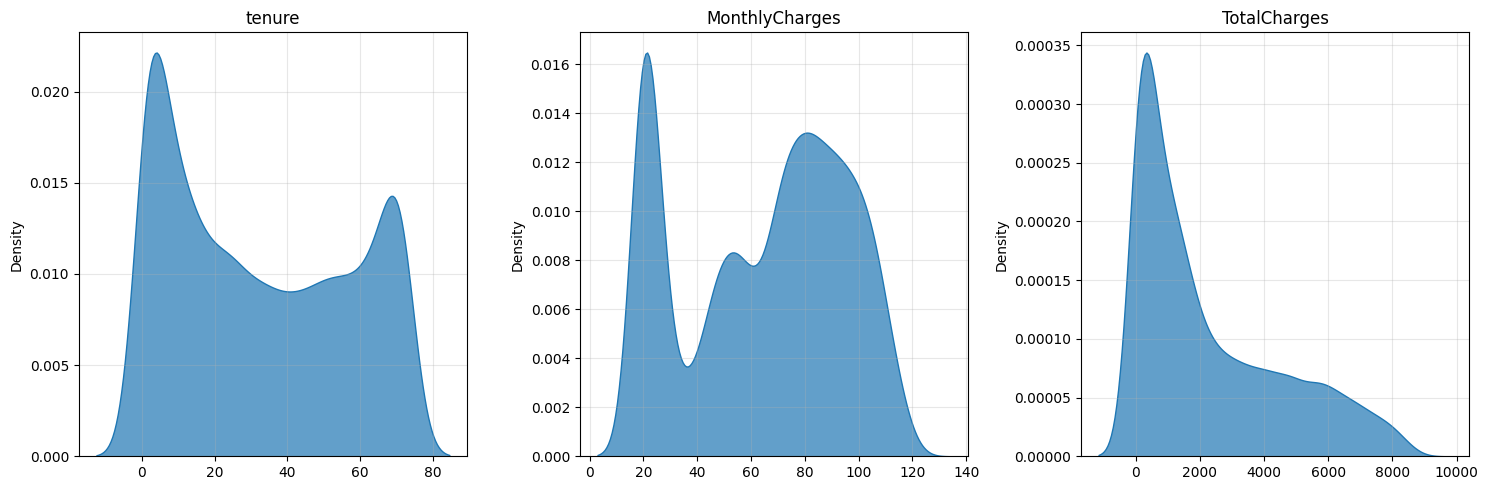

In [34]:
# Check the data types and sample values for numerical columns
print("=== CHECKING NUMERICAL COLUMNS ===")

for col in numerical_columns:
    print(f"\nColumn: {col}")
    print(f"Data type: {df_1[col].dtype}")
    print(f"Unique values count: {df_1[col].nunique()}")
    print(f"Sample values: {df_1[col].unique()[:10]}")
    print(f"Contains non-numeric values: {df_1[col].dtype == 'object'}")
    
    # Check for specific problematic values
    if df_1[col].dtype == 'object':
        print(f"Value counts:")
        print(df_1[col].value_counts().head())

# Fix the TotalCharges column if it contains non-numeric values
print("\n=== FIXING DATA TYPES ===")

# Convert TotalCharges to numeric (common issue in telco datasets)
if 'TotalCharges' in df_1.columns:
    print(f"TotalCharges before conversion: {df_1['TotalCharges'].dtype}")
    
    # Replace empty strings or spaces with NaN, then convert to numeric
    df_1['TotalCharges'] = pd.to_numeric(df_1['TotalCharges'], errors='coerce')
    
    # Fill NaN values with 0 or median
    df_1['TotalCharges'] = df_1['TotalCharges'].fillna(0)
    
    print(f"TotalCharges after conversion: {df_1['TotalCharges'].dtype}")

# Verify all numerical columns are actually numeric
print("\n=== VERIFICATION ===")
truly_numerical_columns = []

for col in numerical_columns:
    if col in df_1.columns:
        if pd.api.types.is_numeric_dtype(df_1[col]):
            truly_numerical_columns.append(col)
            print(f"✓ {col} is numeric")
        else:
            print(f"✗ {col} is not numeric - dtype: {df_1[col].dtype}")

print(f"\nTruly numerical columns: {truly_numerical_columns}")

# Now create the plots with only truly numerical columns
if truly_numerical_columns:
    fig, axes = plt.subplots(1, len(truly_numerical_columns), figsize=(15, 5))
    
    # Handle case where there's only one numerical column
    if len(truly_numerical_columns) == 1:
        axes = [axes]
    
    for idx, col in enumerate(truly_numerical_columns):
        sns.kdeplot(
            data=df_1[col],
            ax=axes[idx],
            fill=True,
            alpha=0.7
        )
        axes[idx].set_title(col)
        axes[idx].set_xlabel('')
        axes[idx].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("No truly numerical columns found for plotting!")


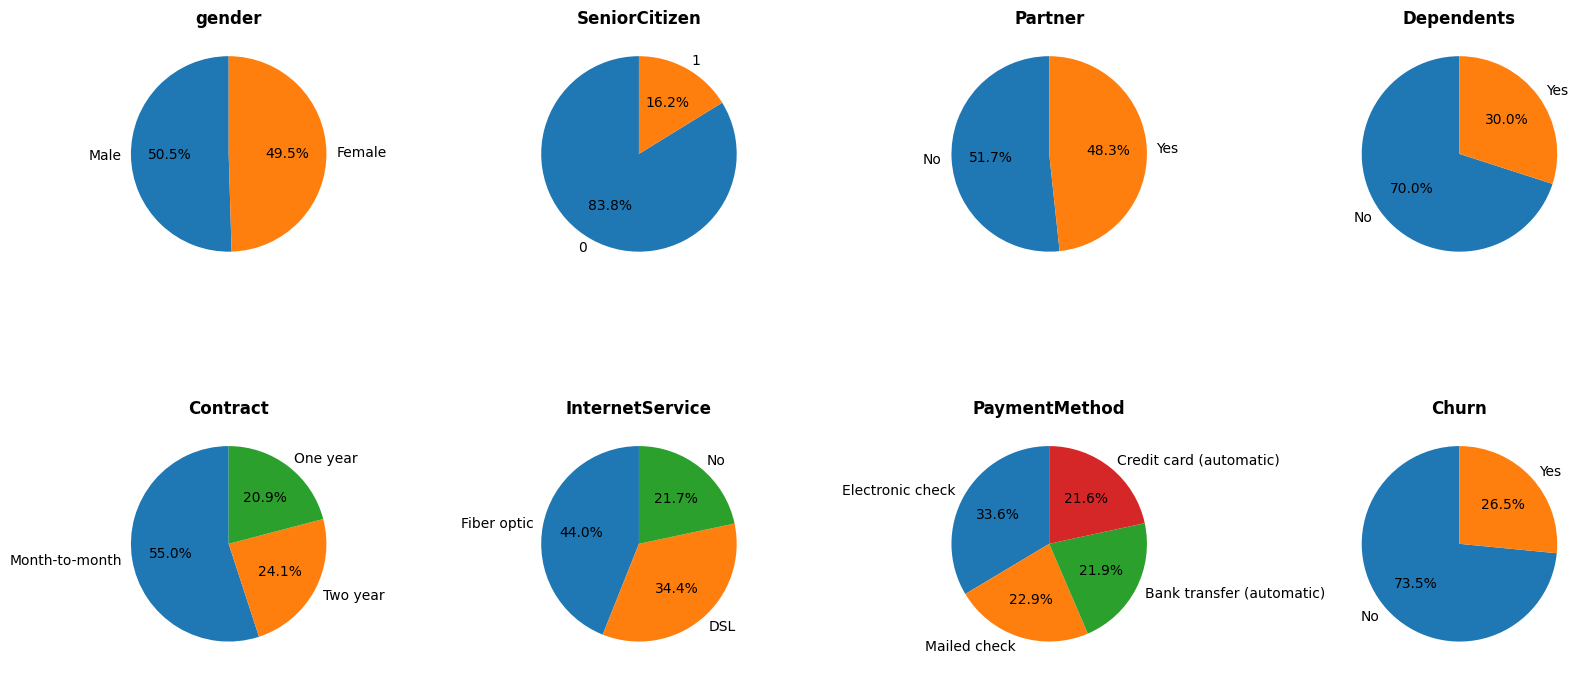

In [40]:
important_categorical = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 
    'Contract', 'InternetService', 'PaymentMethod', 'Churn'
]

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for idx, col in enumerate(important_categorical):
    if col in df_1.columns:
        df_1[col].value_counts().plot(
            kind='pie',
            ax=axes[idx],
            autopct='%1.1f%%',
            startangle=90
        )
        axes[idx].set_title(col, fontweight='bold')
        axes[idx].set_ylabel('')

plt.tight_layout()
plt.show()

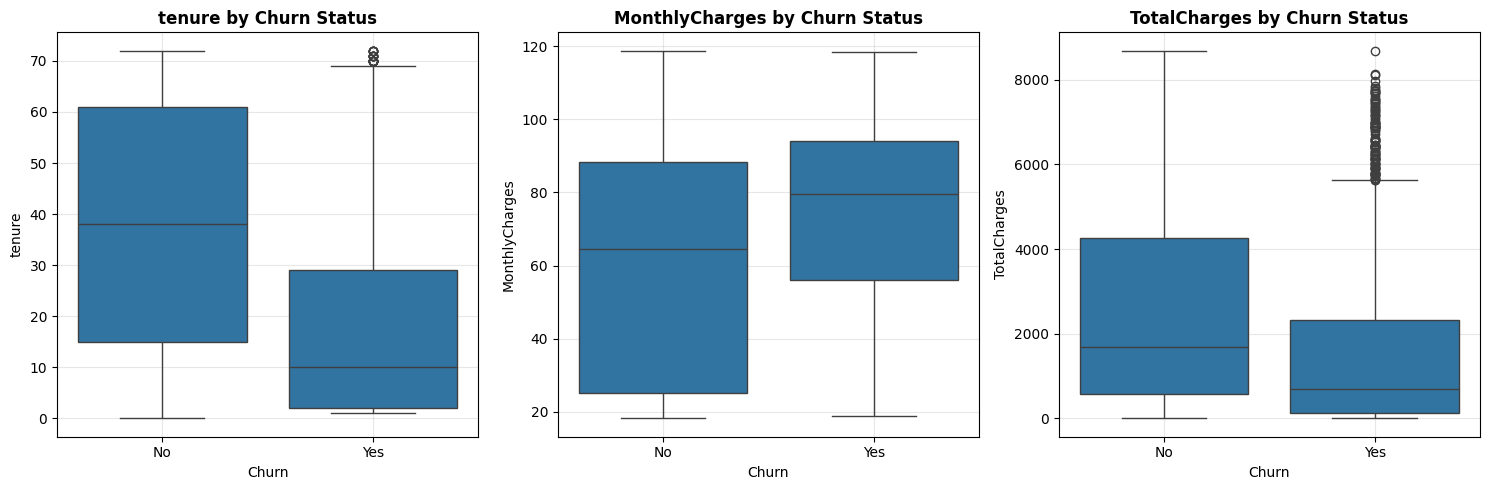

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, col in enumerate(numerical_columns):
    sns.boxplot(data=df_1, x='Churn', y=col, ax=axes[idx])
    axes[idx].set_title(f'{col} by Churn Status', fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [42]:
def find_anomaly(data):

  mean = data.mean()
  std = data.std()

  upper_bound = mean + (3 * std)
  lower_bound = mean - (3 * std)

  return (data > upper_bound)| (data < lower_bound)

In [43]:
numerical_columns = [
    'tenure',
    'MonthlyCharges',
    'TotalCharges'
]

for col in numerical_columns:
  n_outliers = find_anomaly(df_1[col]).sum()
  n_outlier_precentage = round(n_outliers / len(df), 3)
  print(f" {col} : {n_outliers} outliers({n_outlier_precentage} %)")

 tenure : 0 outliers(0.0 %)
 MonthlyCharges : 0 outliers(0.0 %)
 TotalCharges : 0 outliers(0.0 %)


In [ ]:
def find_anomaly(data):

  Q1 = np.percentile(data, 25)
  Q3 = np.percentile(data, 75)

  IQR = Q3 - Q1

  upper_bound = Q3 + 1.5 * IQR
  lower_bound = Q1 - 1.5 * IQR

  return (data > upper_bound)| (data < lower_bound)

In [44]:
numerical_columns = [
    'tenure',
    'MonthlyCharges',
    'TotalCharges'
]
for col in numerical_columns:
  n_outliers = find_anomaly(df_1[col]).sum()
  n_outlier_precentage = round(n_outliers / len(df), 3)
  print(f" {col} : {n_outliers} outliers({n_outlier_precentage} %)")

 tenure : 0 outliers(0.0 %)
 MonthlyCharges : 0 outliers(0.0 %)
 TotalCharges : 0 outliers(0.0 %)
